In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

In [47]:
result

,sampler,sample_size,sample_prop,metric,value
0,lazy_greed,1303,0.05,precision_score,0.795206
1,lazy_greed,1303,0.05,recall_score,0.773120
2,lazy_greed,1303,0.05,f1_score,0.782981
3,lazy_greed,1303,0.05,precision_score,0.774543
4,lazy_greed,1303,0.05,recall_score,0.753780
...,...,...,...,...,...
3145,full_dataset,26048,1.00,recall_score,0.746613
3146,full_dataset,26048,1.00,f1_score,0.775384
3147,full_dataset,26048,1.00,precision_score,0.829353
3148,full_dataset,26048,1.00,recall_score,0.749434


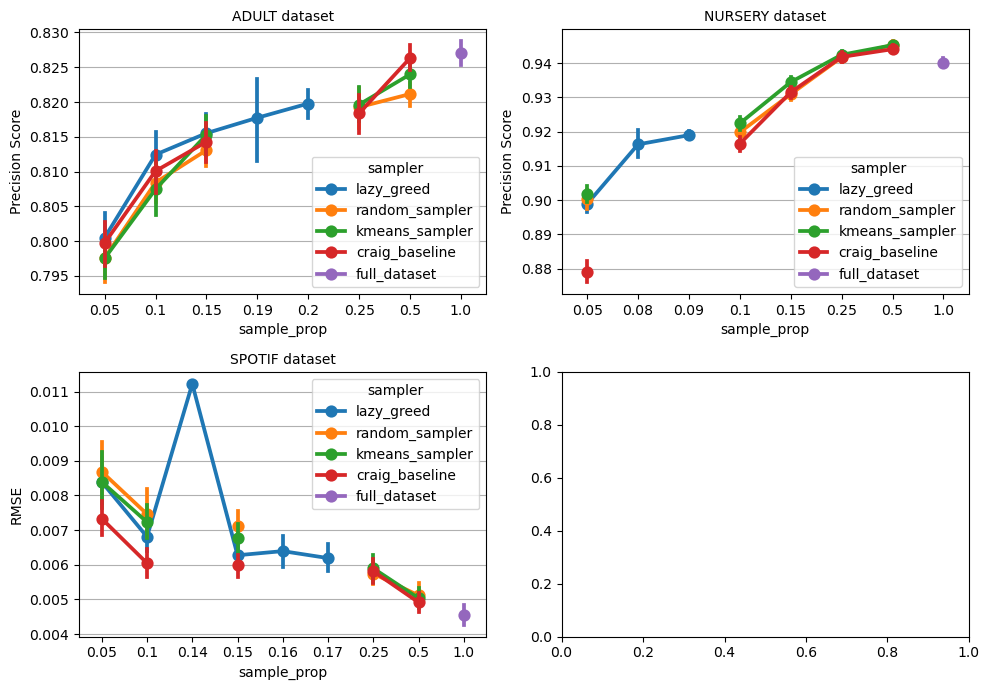

In [190]:
curdir = Path()
files = [*curdir.rglob('*.csv')]

fig, ax = plt.subplots(2,2, figsize=(10, 7))

result = pd.read_csv(files[0])
result.fillna('full_dataset', inplace=True)
result = result[(result.metric=='precision_score')]
result.sample_prop = (result.sample_size / result.sample_size.max()).round(2)
sns.pointplot(data=result, x='sample_prop', y='value', hue='sampler', ax=ax[0,0])
ax[0,0].set_title(f'{files[0].stem.upper()} dataset', fontsize=10)
ax[0,0].set_ylabel('Precision Score')
ax[0,0].grid(axis='y')

result = pd.read_csv(files[1])
result.fillna('full_dataset', inplace=True)
result.sample_prop = (result.sample_size / result.sample_size.max()).round(2)
sns.pointplot(data=result, x='sample_prop', y='value', hue='sampler', ax=ax[1,0])
ax[1, 0].set_title(f'{files[1].stem.upper()} dataset', fontsize=10)
ax[1, 0].set_ylabel('RMSE')
ax[1, 0].grid(axis='y')

result = pd.read_csv(files[2])
result.fillna('full_dataset', inplace=True)
result = result[(result.metric=='precision_score')]
result.sample_prop = (result.sample_size / result.sample_size.max()).round(2)
sns.pointplot(data=result, x='sample_prop', y='value', hue='sampler', ax=ax[0,1])
ax[0, 1].set_title(f'{files[2].stem.upper()} dataset', fontsize=10)
ax[0,1].set_ylabel('Precision Score')
ax[0,1].grid(axis='y')

plt.tight_layout()
plt.show()

<Axes: xlabel='sample_prop', ylabel='sample_size'>

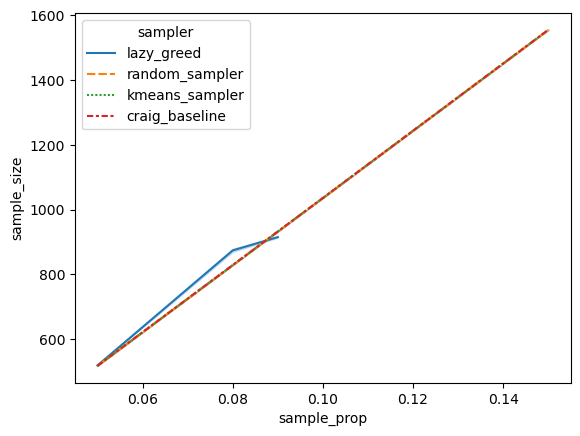

In [188]:
sns.lineplot(data=result[result.sample_prop<.25], x='sample_prop', y='sample_size', hue='sampler', style='sampler')